In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data = df[['airline_sentiment', 'text']].copy()
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<AxesSubplot:>

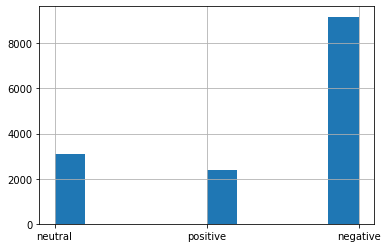

In [4]:
data['airline_sentiment'].hist()

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['sentiment'] = label_encoder.fit_transform(data['airline_sentiment'])
data.head()

,airline_sentiment,text,sentiment
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials t...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [7]:
df_train, df_test = train_test_split(data)
df_train.head()

,airline_sentiment,text,sentiment
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [19]:
vectorizer = TfidfVectorizer(max_features=2000)
# vectorizer = CountVectorizer(max_features=2000)

In [20]:
X_train = vectorizer.fit_transform(df_train['text'])
X_train
X_test = vectorizer.fit_transform(df_test['text'])

In [21]:
Y_train = df_train['sentiment']
Y_test = df_test['sentiment']

In [22]:
# Building the logistric regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

print("Train Acc: ", model.score(X_train, Y_train))
print("Test Acc: ", model.score(X_test, Y_test))

Train Acc:  0.8548269581056467
Test Acc:  0.5598360655737705


In [24]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)

print("Train AUC", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC 0.9430981950715588
Test AUC 0.5489177783570103


In [26]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [28]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96486133, 0.02700741, 0.00813126],
       [0.30193548, 0.64645161, 0.0516129 ],
       [0.19909502, 0.10067873, 0.70022624]])

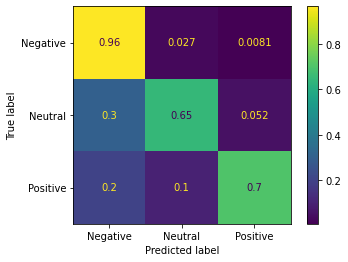

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
classes = ['Negative', 'Neutral', 'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classes)
disp.plot()
plt.show()

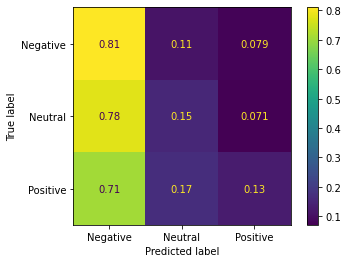

In [31]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                             display_labels=classes)
disp.plot()
plt.show()